# Task

! Note: this workshop is based on a Kaggle challenge and dataset: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

### Set up for participants
Imagine you're working for an HR-Tech agency as a Data Specialist, and your job is to conduct research that helps companies work with their employees and candidates in more efficient ways. 

Today your task is to analyze the data of an IT company and propose some suggestions for them. The company runs the upskilling courses, and the best graduates get a chance to get hired. 
Your client wants to know which of these candidates actually want to work for the company after the training and which will be looking for another opportunity.

In the dataset, you'll find the credentials, demographics and experience of the candidates. You'll need to identify the factors, based on which you'll decide whether the candidate wants to work for the company.


In [11]:
import pandas as pd
import numpy as np

In [12]:
employees_dataset = pd.read_csv('aug_train.csv')

employees_dataset['target'] = employees_dataset['target'].astype(int)

## Part 1. Get closer to the data in general
Look at the data. What would be our first step?

Next questions to discuss:
1. Which columns do we have? 
2. What each of them contains?
3. What types of data do we have?
4. Do we have enough data? 
5. How many null values do we have?


In [13]:
employees_dataset.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


Features

- **enrollee_id** : Unique ID for candidate
- **city**: City code
- **city_development_index** : Developement index of the city (scaled)
- **gender**: Gender of candidate
- **relevent_experience**: Relevant experience of candidate
- **enrolled_university**: Type of University course enrolled if any
- **education_level**: Education level of candidate
- **major_discipline** :Education major discipline of candidate
- **experience**: Candidate total experience in years
- **company_size**: No of employees in current employer's company
- **company_type** : Type of current employer
- **lastnewjob**: Difference in years between previous job and current job
- **training_hours**: training hours completed
- **target**: 0 – Not looking for job change, 1 – Looking for a job change

#### How many Nulls do we have?

In [14]:
employees_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

## Part 2. Look at the column values

At which columns should we look first?

In [15]:
employees_dataset.target.unique()

array([1, 0])

In [16]:
employees_dataset.target.value_counts()

0    14381
1     4777
Name: target, dtype: int64

In [17]:
#Analyze using Pandas
employees_dataset.target.value_counts(normalize=True)

0    0.750652
1    0.249348
Name: target, dtype: float64

<AxesSubplot:>

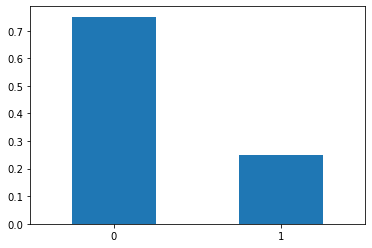

In [20]:
#Draw a graph
%matplotlib inline

employees_dataset.target.value_counts(normalize=True).plot(kind='bar', rot=0)

Don't forget to format your chart in a proper way, it's very important.

### **Perfect chart checklist:**
- [ ] **Title**
- [ ] **Color legend**
- [ ] **Axis labels with units (if exist)**
- [ ] **Axis values**

We can rename xticks for groups for better understanding.

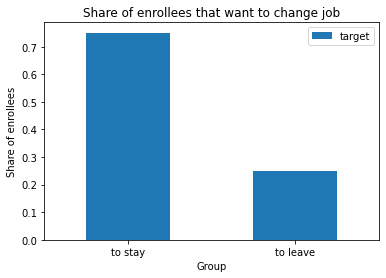

In [29]:
import matplotlib.pyplot as plt

employees_dataset.target.value_counts(normalize=True).plot(kind='bar', rot=0)
plt.title('Share of enrollees that want to change job')
plt.legend()
plt.xlabel('Group')
plt.ylabel('Share of enrollees')
plt.xticks(ticks = [0,1], labels = ['to stay', 'to leave'])
plt.show()

## Part 3. Look at other column values
Let's use more chart tools. For example, change the font color. Docs are available here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

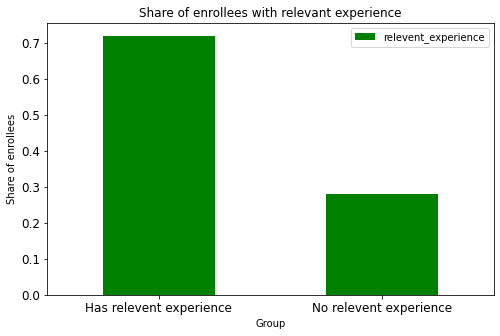

In [40]:
employees_dataset.relevent_experience.value_counts(normalize = True).plot(
    kind='bar', rot=0, color = 'green', fontsize = 12, figsize = (8,5)
)
plt.title('Share of enrollees with relevant experience')
plt.legend()
plt.xlabel('Group')
plt.ylabel('Share of enrollees')
plt.show()

We can also add values for each bar for better clarity.

In [48]:
data_for_edu_bar

Graduate          0.620280
Masters           0.233234
High School       0.107872
Phd               0.022141
Primary School    0.016472
Name: education_level, dtype: float64

In [50]:
data_for_edu_bar.to_dict().items()

dict_items([('Graduate', 0.6202802438763504), ('Masters', 0.23323350090918815), ('High School', 0.10787249973259172), ('Phd', 0.022141405497914216), ('Primary School', 0.016472349983955505)])

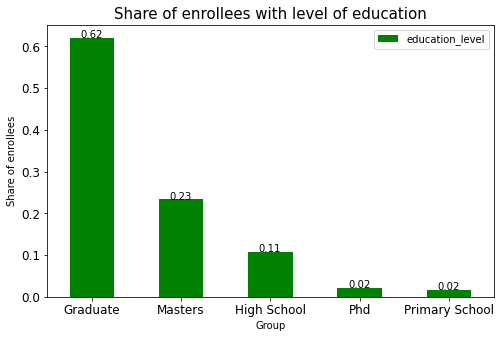

In [53]:
data_for_edu_bar = employees_dataset.education_level.value_counts(normalize = True)

data_for_edu_bar.plot(
    kind='bar', rot=0, color = 'green', fontsize = 12, figsize = (8,5)
)
plt.title('Share of enrollees with level of education', fontsize = 15)
plt.legend()
plt.xlabel('Group')
plt.ylabel('Share of enrollees')

for i, (x,y) in enumerate(data_for_edu_bar.to_dict().items()):
    plt.text(i-.13, y, s=str(round(y, 2)))
plt.show()

There are too many columns to copy and paste the data. Let's automate it!

In [17]:
def show_bar_chart(dataframe: pd.core.frame.DataFrame, column_name: str):
    bar_data = dataframe[column_name].value_counts(normalize=True)

    bar_data.plot(
        kind='bar', figsize=(10, 3), rot=0, color='orange', fontsize=12
    )
    
    beautify_column_name = column_name[0].upper() + column_name[1:].replace('_', ' ')
    # relevent_experience -> Relevent experience
    
    plt.title(f'{beautify_column_name} of enrollees', fontsize=18)
    plt.ylabel('Share of enrollees', fontsize=10)
    plt.xlabel(beautify_column_name, fontsize=10)

    for i, (x, y) in enumerate(bar_data.to_dict().items()):
        plt.text(i-.15, y, s=str(round(y, 2)), fontsize=11)

    plt.show()

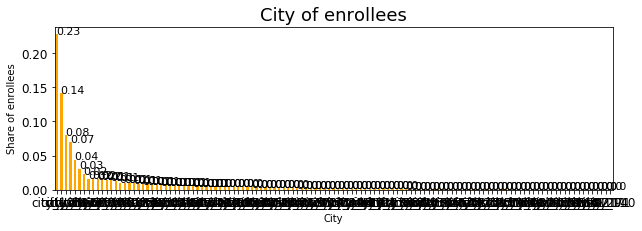

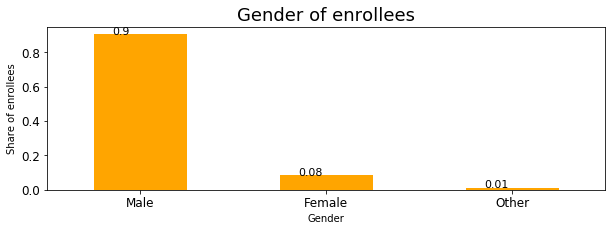

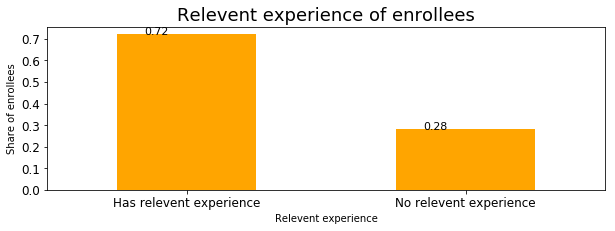

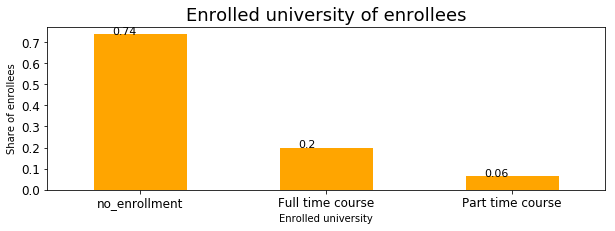

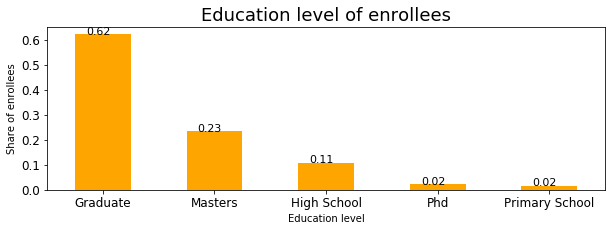

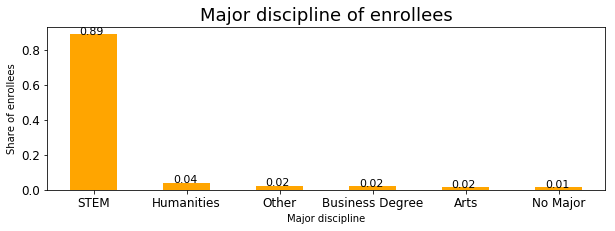

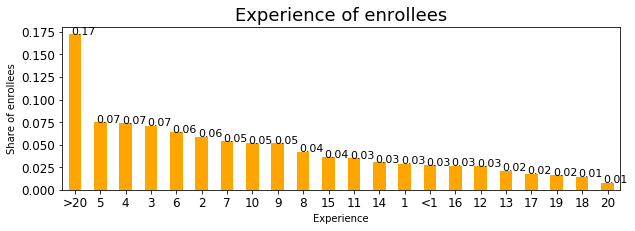

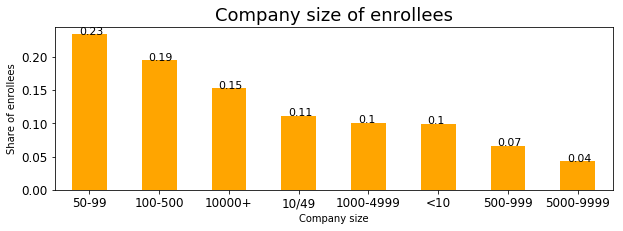

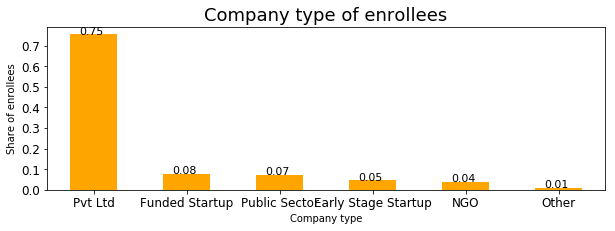

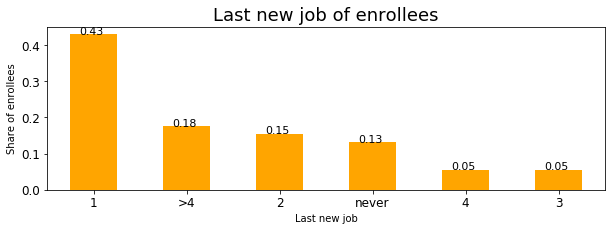

In [18]:
%matplotlib inline

for column in employees_dataset.columns:
    if employees_dataset[column].dtype == 'O':
        show_bar_chart(employees_dataset, column)

## Part 4. Other charts and going deeper
Numerical features can be shown as histograms.  
Look at the City development index histogram. We can simplify this data by dividing it into groups for easier analysis.

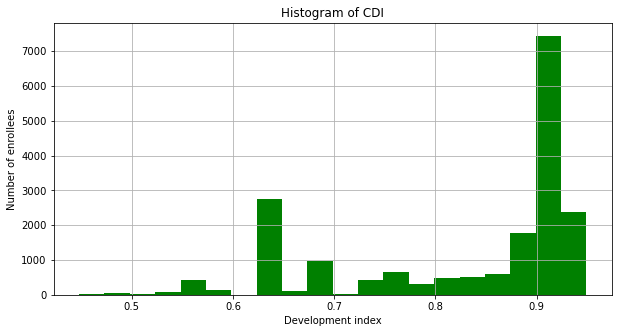

In [57]:
employees_dataset.city_development_index.hist(bins = 20, figsize=(10,5), color = 'green')
plt.title('Histogram of CDI')
plt.xlabel('Development index')
plt.ylabel('Number of enrollees')
plt.show()

In [59]:
employees_dataset.city_development_index.min()

0.4479999999999999

In [60]:
employees_dataset.city_development_index.max()

0.949

<AxesSubplot:>

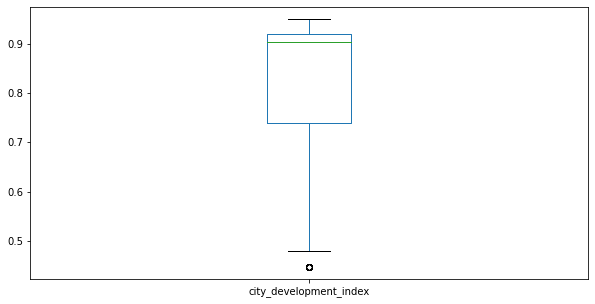

In [61]:
employees_dataset.city_development_index.plot(kind = 'box', figsize=(10,5))


In [62]:
employees_dataset.city_development_index.mean()

0.8288480008351684

In [63]:
employees_dataset.city_development_index.median()

0.903

## Part 5. Compare features
Our goal is to understand how enrollees background affects the target. Let's look at slices or make a grouped chart.

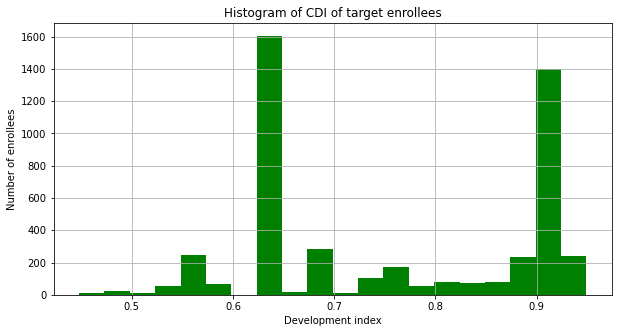

In [66]:
employees_dataset[employees_dataset.target == 1].city_development_index.hist(bins = 20, figsize=(10,5), color = 'green')
plt.title('Histogram of CDI of target enrollees')
plt.xlabel('Development index')
plt.ylabel('Number of enrollees')
plt.show()

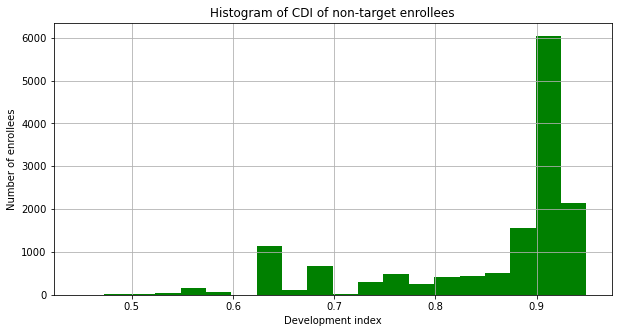

In [67]:
employees_dataset[employees_dataset.target == 0].city_development_index.hist(bins = 20, figsize=(10,5), color = 'green')
plt.title('Histogram of CDI of non-target enrollees')
plt.xlabel('Development index')
plt.ylabel('Number of enrollees')
plt.show()

[]

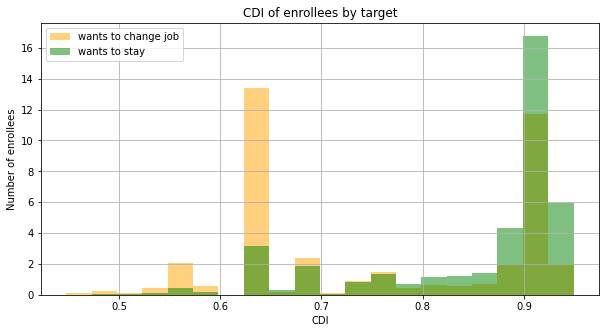

In [74]:
employees_dataset[employees_dataset.target == 1].city_development_index.hist(
    bins = 20, figsize=(10,5), color = 'orange', alpha = 0.5, density = True
)

employees_dataset[employees_dataset.target == 0].city_development_index.hist(
    bins = 20, figsize=(10,5), color = 'green', alpha = 0.5, density = True
)

plt.title('CDI of enrollees by target')
plt.legend(['wants to change job', 'wants to stay'])
plt.xlabel('CDI')
plt.ylabel('Number of enrollees')
plt.plot()

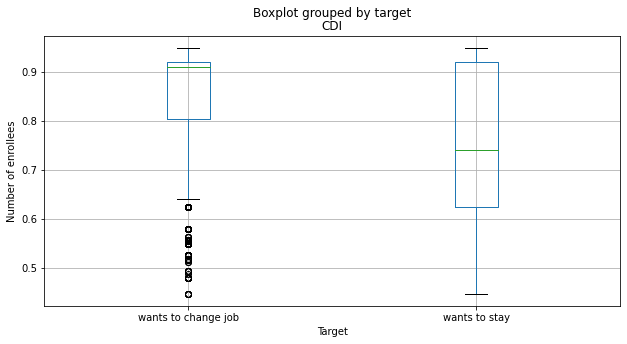

In [79]:
employees_dataset[['city_development_index','target']].boxplot(figsize=(10,5), by='target')
plt.title('CDI')
plt.xlabel('Target')
plt.xticks([1,2], ['wants to change job', 'wants to stay'])
plt.ylabel('Number of enrollees')
plt.show()

What can we say about enrollees from cities with lower development?
What chart shows this fact the best way? Or in other words, what chart will you put to the report to prove your statement to the client?